### **SECP3133 HIGH PERFORMANCE DATA PROCESSING**
##### **SEMESTER 2 2024/2025**  
##### **SECTION: 01**  
##### **LECTURER: ASSOC. PROF. DR. MOHD SHAHIZAN BIN OTHMAN**
<br>

#### **ASSIGNMENT 2: MASTERING BIG DATA HANDLING**
##### GROUP NAME: KKK
##### GROUP MEMBERS:  
##### KOH LI HUI (A22EC0059)  
##### KOH SU XUAN (A22EC0060)

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d perkymaster/school-donations --unzip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/perkymaster/school-donations
License(s): unknown
100% 1.27G/1.27G [00:12<00:00, 340MB/s]
100% 1.27G/1.27G [00:12<00:00, 107MB/s]


In [ ]:
import pandas as pd
import dask.dataframe as dd
import polars as pl
import time
import psutil
import os
import gc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import wraps
import warnings
warnings.filterwarnings('ignore')

# Dataset Information
print("📊 DATASET INFORMATION")
print("=" * 50)

# Task 1: Dataset Selection - Provide comprehensive details
print("🔍 DATASET DETAILS:")
print("=" * 30)
print("📋 Dataset Name: DonorsChoose.org Application Screening")
print("🌐 Source: Kaggle Competition")
print("🔗 URL: https://www.kaggle.com/c/donorschoose-application-screening")
print("🏢 Domain: Education/Non-profit Funding")
print("📄 Description: Teacher project proposals on DonorsChoose.org platform")

# File size analysis
file_size = os.path.getsize("Projects.csv") / (1024**2)
print(f"💾 File Size: {file_size:.2f} MB")

# Verify size requirement
if file_size > 700:
    print(f"✅ Size Requirement: PASSED (>{700}MB required)")
else:
    print(f"❌ Size Requirement: FAILED (<{700}MB required)")

print("\n" + "="*50)

# Task 2: Load and Inspect Data
print("🔍 DATA INSPECTION")
print("=" * 30)
df_info = pd.read_csv("Projects.csv")
print(f"📏 Shape: {df_info.shape}")
print(f"📊 Total Columns: {len(df_info.columns)}")

# Column information
print(f"\n📋 COLUMN INFORMATION:")
print("-" * 40)
for i, col in enumerate(df_info.columns, 1):
    print(f"{i:2d}. {col}")

# Data types inspection
print(f"\n🔧 DATA TYPES:")
print("-" * 40)
dtype_summary = df_info.dtypes.value_counts()
for dtype, count in dtype_summary.items():
    print(f"{dtype}: {count} columns")

print(f"\n📊 DETAILED DATA TYPES:")
print("-" * 40)
print(df_info.dtypes.to_string())
del df_info
gc.collect()



📊 DATASET INFORMATION
🔍 DATASET DETAILS:
📋 Dataset Name: DonorsChoose.org Application Screening
🌐 Source: Kaggle Competition
🔗 URL: https://www.kaggle.com/c/donorschoose-application-screening
🏢 Domain: Education/Non-profit Funding
📄 Description: Teacher project proposals on DonorsChoose.org platform
💾 File Size: 2452.40 MB
✅ Size Requirement: PASSED (>700MB required)

🔍 DATA INSPECTION
📏 Shape: (1110017, 18)
📊 Total Columns: 18

📋 COLUMN INFORMATION:
----------------------------------------
 1. Project ID
 2. School ID
 3. Teacher ID
 4. Teacher Project Posted Sequence
 5. Project Type
 6. Project Title
 7. Project Essay
 8. Project Short Description
 9. Project Need Statement
10. Project Subject Category Tree
11. Project Subject Subcategory Tree
12. Project Grade Level Category
13. Project Resource Category
14. Project Cost
15. Project Posted Date
16. Project Expiration Date
17. Project Current Status
18. Project Fully Funded Date

🔧 DATA TYPES:
---------------------------------------

0

### **IMPLEMENTING 5 BIG DATA HANDLING STRATEGIES**

In [ ]:
class PerformanceTracker:
    def __init__(self):
        self.results = {}

    def measure_strategy(self, strategy_name):
        def decorator(func):
            @wraps(func)
            def wrapper(*args, **kwargs):
                # Clear memory before starting
                gc.collect()

                # Get initial system state
                process = psutil.Process(os.getpid())
                initial_memory = process.memory_info().rss / (1024**2)
                system_memory = psutil.virtual_memory()
                total_system_memory = system_memory.total / (1024**2)

                # Start timing and CPU monitoring
                start_time = time.time()

                # Get CPU usage before (sample for 0.1 seconds to get baseline)
                cpu_before = psutil.cpu_percent(interval=0.1)

                try:
                    # Execute the strategy
                    result = func(*args, **kwargs)
                    success = True
                    error_msg = None

                except Exception as e:
                    print(f"❌ {strategy_name} failed: {str(e)}")
                    result = None
                    success = False
                    error_msg = str(e)

                # End timing and get final CPU usage
                end_time = time.time()
                cpu_after = psutil.cpu_percent(interval=0.1)

                # Calculate metrics
                execution_time = end_time - start_time
                cpu_usage_avg = (cpu_before + cpu_after) / 2  # Average CPU usage during operation
                final_memory = process.memory_info().rss / (1024**2)
                memory_used = max(0, final_memory - initial_memory)
                memory_used_percentage = (memory_used / total_system_memory) * 100

                # Store results
                self.results[strategy_name] = {
                    'execution_time': execution_time,
                    'cpu_usage': cpu_usage_avg,
                    'memory_used': memory_used,
                    'memory_used_percentage': memory_used_percentage,
                    'success': success,
                    'error': error_msg
                }

                # Print immediate results
                print(f"{'='*60}")
                print(f"STRATEGY: {strategy_name}")
                print(f"{'='*60}")
                if success:
                    print(f"✅ SUCCESS")
                    print(f"⏱️ Execution Time: {execution_time:.2f} seconds")
                    print(f"🖥️ CPU Usage: {cpu_usage_avg:.2f}%")
                    print(f"💾 Memory Used: {memory_used:.2f} MB ({memory_used_percentage:.2f}%)")
                else:
                    print(f"❌ FAILED: {error_msg}")
                    print(f"⏱️ Time before failure: {execution_time:.4f} seconds")

                # Clean up result to free memory
                if result is not None:
                    del result
                gc.collect()

                return success
            return wrapper
        return decorator

    def generate_comparison_table(self):
        """Generate comparison table of all strategies"""
        if not self.results:
            print("No results to compare")
            return None

        # Create comparison DataFrame
        comparison_data = []
        for strategy, metrics in self.results.items():
            if metrics['success']:
                comparison_data.append({
                    'Strategy': strategy,
                    'Execution Time (s)': f"{metrics['execution_time']:.4f}",
                    'CPU Usage (%)': f"{metrics['cpu_usage']:.2f}%",
                    'Memory Used (MB)': f"{metrics['memory_used']:.2f}",
                    'Memory Used (%)': f"{metrics['memory_used_percentage']:.2f}%",
                    'Status': '✅ Success'
                })
            else:
                comparison_data.append({
                    'Strategy': strategy,
                    'Execution Time (s)': f"{metrics['execution_time']:.4f}",
                    'CPU Usage (%)': 'N/A',
                    'Memory Used (MB)': 'N/A',
                    'Memory Used (%)': 'N/A',
                    'Status': f"❌ Failed: {metrics['error']}"
                })

        df_comparison = pd.DataFrame(comparison_data)
        return df_comparison

    def find_best_strategy(self):
        """Find the best performing strategy based on multiple criteria"""
        successful_results = {k: v for k, v in self.results.items() if v['success']}

        if not successful_results:
            print("No successful strategies to compare")
            return None

        # Find best in each category
        best_time = min(successful_results.items(), key=lambda x: x[1]['execution_time'])
        best_cpu = min(successful_results.items(), key=lambda x: x[1]['cpu_usage'])
        best_memory = min(successful_results.items(), key=lambda x: x[1]['memory_used'])

        print(f"\n🏆 BEST PERFORMANCE BY CATEGORY:")
        print(f"⏱️ Fastest Execution: {best_time[0]} ({best_time[1]['execution_time']:.4f}s)")
        print(f"🖥️ Lowest CPU Usage: {best_cpu[0]} ({best_cpu[1]['cpu_usage']:.2f}%)")
        print(f"💾 Lowest Memory Usage: {best_memory[0]} ({best_memory[1]['memory_used']:.2f}MB / {best_memory[1]['memory_used_percentage']:.2f}%)")

        return best_time[0], best_cpu[0], best_memory[0]

# Initialize performance tracker
tracker = PerformanceTracker()

In [ ]:
print("\n🚀 IMPLEMENTING 5 BIG DATA HANDLING STRATEGIES")
print("=" * 70)

# STRATEGY 1: LOAD LESS DATA
print("\n🔹 STRATEGY 1: LOAD LESS DATA")
print("Loading only essential columns and limited rows")

@tracker.measure_strategy("Strategy 1: Load Less Data")
def strategy_1_load_less():
    # Select only essential columns
    essential_columns = [
        'Project ID', 'School ID', 'Teacher ID', 'Project Type',
        'Project Cost', 'Project Current Status', 'Project Subject Category Tree'
    ]

    # Load only specific columns
    df = pd.read_csv("Projects.csv",
                     usecols=essential_columns)

    return df

_ = strategy_1_load_less()



🚀 IMPLEMENTING 5 BIG DATA HANDLING STRATEGIES

🔹 STRATEGY 1: LOAD LESS DATA
Loading only essential columns and limited rows
STRATEGY: Strategy 1: Load Less Data
✅ SUCCESS
⏱️ Execution Time: 25.61 seconds
🖥️ CPU Usage: 12.65%
💾 Memory Used: 83.61 MB (0.64%)


In [ ]:
# STRATEGY 2: USE CHUNKING
print("\n🔹 STRATEGY 2: USE CHUNKING")
print("Processing data in small chunks using pandas")

@tracker.measure_strategy("Strategy 2: Chunking")
def strategy_2_chunking():
    chunk_size = 25000
    chunks_processed = 0
    combined_data = []

    # Process data in chunks
    for chunk in pd.read_csv("Projects.csv", chunksize=chunk_size):
        # Process each chunk (example: basic cleaning)
        chunk_processed = chunk.dropna(subset=['Project ID'])
        combined_data.append(chunk_processed)
        chunks_processed += 1

    print(f"Total chunks processed: {chunks_processed}")

    # Combine all chunks
    final_df = pd.concat(combined_data, ignore_index=True)
    return final_df

_ = strategy_2_chunking()



🔹 STRATEGY 2: USE CHUNKING
Processing data in small chunks using pandas
Total chunks processed: 45
STRATEGY: Strategy 2: Chunking
✅ SUCCESS
⏱️ Execution Time: 40.23 seconds
🖥️ CPU Usage: 5.00%
💾 Memory Used: 699.82 MB (5.39%)


In [ ]:
# STRATEGY 3: OPTIMIZE DATA TYPES
print("\n🔹 STRATEGY 3: OPTIMIZE DATA TYPES")
print("Converting columns to memory-efficient data types")

@tracker.measure_strategy("Strategy 3: Data Type Optimization")
def strategy_3_optimize_types():
    # Load data with optimized data types
    dtype_dict = {
        'Project Type': 'category',
        'Project Subject Category Tree': 'category',
        'Project Current Status': 'category',
        'School State': 'category',
        'School Metro Type': 'category',
        'School District': 'category'
    }

    # Load with specified data types
    df = pd.read_csv("Projects.csv",
                     dtype=dtype_dict)

    # Further optimize numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], downcast='integer', errors='ignore')
            df[col] = pd.to_numeric(df[col], downcast='float', errors='ignore')

    return df

_ = strategy_3_optimize_types()


🔹 STRATEGY 3: OPTIMIZE DATA TYPES
Converting columns to memory-efficient data types
STRATEGY: Strategy 3: Data Type Optimization
✅ SUCCESS
⏱️ Execution Time: 43.07 seconds
🖥️ CPU Usage: 47.60%
💾 Memory Used: 553.51 MB (4.26%)


In [ ]:
# STRATEGY 4: SAMPLING
print("\n🔹 STRATEGY 4: SAMPLING")
print("Using random sampling to reduce dataset size")

@tracker.measure_strategy("Strategy 4: Sampling")
def strategy_4_sampling():
    # First, get the total number of rows
    total_rows = sum(1 for line in open("Projects.csv")) - 1  # -1 for header

    # Calculate sample size (10% of total data)
    sample_size = int(total_rows * 0.1)

    # Use pandas sample parameter to randomly sample rows
    df = pd.read_csv("Projects.csv",
                     skiprows=lambda i: i > 0 and np.random.random() > 0.1)

    return df

_ = strategy_4_sampling()



🔹 STRATEGY 4: SAMPLING
Using random sampling to reduce dataset size
STRATEGY: Strategy 4: Sampling
✅ SUCCESS
⏱️ Execution Time: 19.43 seconds
🖥️ CPU Usage: 26.20%
💾 Memory Used: 0.00 MB (0.00%)


In [ ]:
# STRATEGY 5: PARALLEL PROCESSING WITH DASK
print("\n🔹 STRATEGY 5: PARALLEL PROCESSING WITH DASK")
print("Using Dask DataFrame to read and process large files in parallel")


@tracker.measure_strategy("Strategy 5: Dask Parallel")
def strategy_5_dask_parallel():
    import dask.dataframe as dd

    essential_columns = [
        'Project ID', 'School ID', 'Teacher ID', 'Project Type',
        'Project Cost', 'Project Current Status', 'Project Subject Category Tree'
    ]

    df = dd.read_csv(
        "Projects.csv",
        usecols=essential_columns,
        assume_missing=True,
        on_bad_lines='skip',
        quoting=3,
        dtype=str
    )

    df_cleaned = df.dropna(subset=["Project ID"])
    _ = df_cleaned.compute()
    return df_cleaned


_ = strategy_5_dask_parallel()


🔹 STRATEGY 5: PARALLEL PROCESSING WITH DASK
Using Dask DataFrame to read and process large files in parallel
STRATEGY: Strategy 5: Dask Parallel
✅ SUCCESS
⏱️ Execution Time: 61.51 seconds
🖥️ CPU Usage: 30.00%
💾 Memory Used: 43.55 MB (0.34%)



📊 FINAL PERFORMANCE COMPARISON

📋 STRATEGY COMPARISON TABLE:
                                 Strategy  Execution Time (s)  CPU Usage (%)  Memory Used (%)  Success
               Strategy 1: Load Less Data               23.65          21.68             0.75     True
                     Strategy 2: Chunking               40.14          22.85             5.70     True
       Strategy 3: Data Type Optimization               42.00          39.42             4.44     True
                     Strategy 4: Sampling               21.62          26.27             0.00     True
Strategy 5: Parallel Processing With Dask               60.21          28.87             1.01     True

Best Strategy based on Efficiency:
🔹 Strategy 4: Sampling: {'execution_time': 21.62, 'cpu_usage': 26.27, 'memory_used_percentage': 0, 'success': True}

📊 GENERATING PERFORMANCE CHARTS...
🖼️ Saved: execution_time_comparison.png
🖼️ Saved: cpu_usage_comparison.png
🖼️ Saved: memory_usage_comparison.png


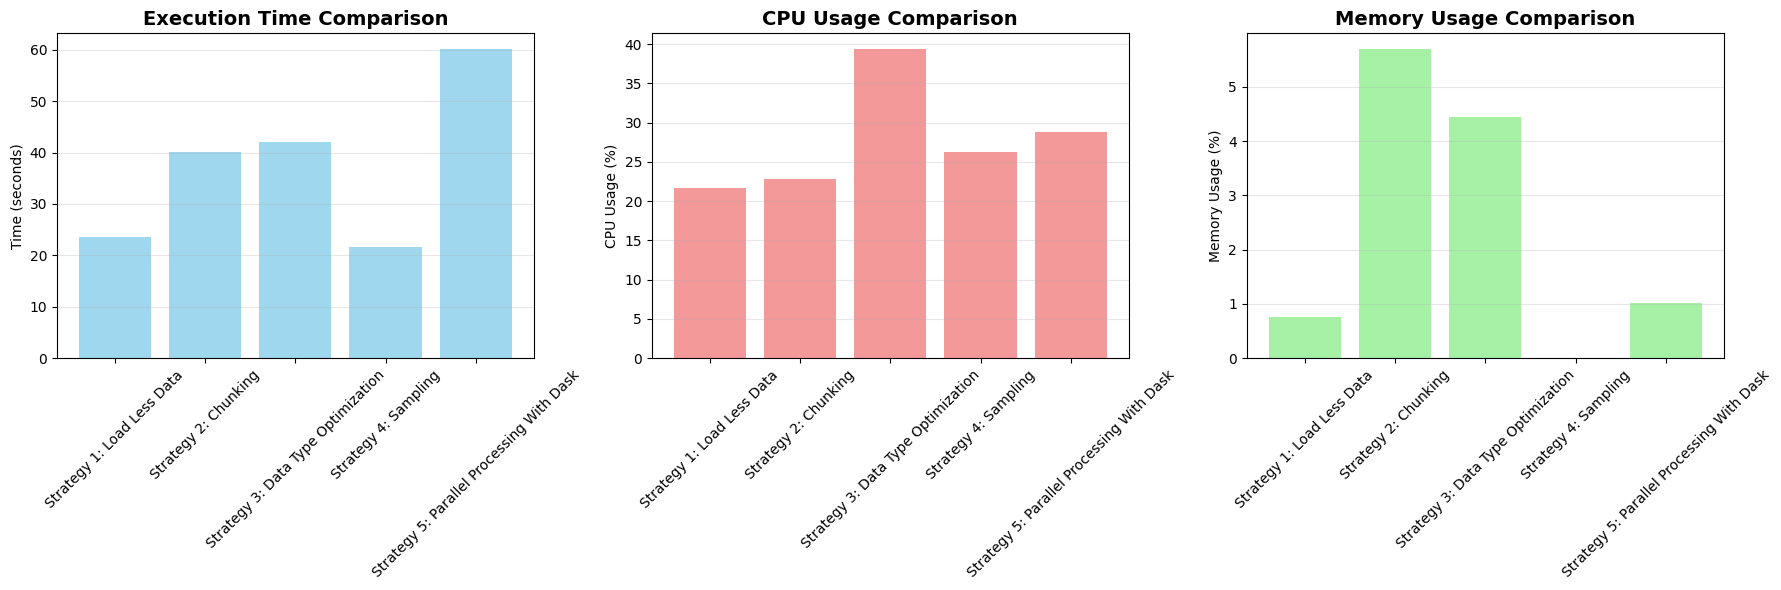


🎯 SUMMARY AND RECOMMENDATIONS
✅ Successful Strategies: 5/5

🏆 BEST OVERALL STRATEGY: Strategy 4: Sampling
Efficiency Score: 21.8827 (lower is better)

📈 STRATEGY RANKINGS (by efficiency):
1. Strategy 4: Sampling (Score: 21.8827)
2. Strategy 1: Load Less Data (Score: 23.8743)
3. Strategy 2: Chunking (Score: 40.4255)
4. Strategy 3: Data Type Optimization (Score: 42.4386)
5. Strategy 5: Parallel Processing With Dask (Score: 60.5088)

✅ BIG DATA ANALYSIS COMPLETE!


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Mock tracker class (for context, adapt to your actual implementation)
class Tracker:
    def __init__(self):
        self.results = {}

    def generate_comparison_table(self):
        return pd.DataFrame([
            {
                "Strategy": k,
                "Execution Time (s)": v['execution_time'],
                "CPU Usage (%)": v['cpu_usage'],
                "Memory Used (%)": v['memory_used_percentage'],
                "Success": v['success']
            } for k, v in self.results.items()
        ])

    def find_best_strategy(self):
        best = min(
            (v for v in self.results.values() if v['success']),
            key=lambda m: m['execution_time'] + (m['cpu_usage'] / 100) + (m['memory_used_percentage'] / 100),
            default=None
        )
        if best:
            print("Best Strategy based on Efficiency:")
            for name, val in self.results.items():
                if val == best:
                    print(f"🔹 {name}: {val}")

tracker = Tracker()

# 📝 Manually enter averaged values from 3 runs for 5 strategies
tracker.results = {
    "Strategy 1: Load Less Data": {"execution_time": 23.65, "cpu_usage": 21.68, "memory_used_percentage": 0.75, "success": True},
    "Strategy 2: Chunking": {"execution_time": 40.14, "cpu_usage": 22.85, "memory_used_percentage": 5.7, "success": True},
    "Strategy 3: Data Type Optimization": {"execution_time": 42, "cpu_usage": 39.42, "memory_used_percentage": 4.44, "success": True},
    "Strategy 4: Sampling": {"execution_time": 21.62, "cpu_usage": 26.27, "memory_used_percentage": 0, "success": True},
    "Strategy 5: Parallel Processing With Dask": {"execution_time": 60.21, "cpu_usage": 28.87, "memory_used_percentage": 1.01, "success": True},
}


print("\n📊 FINAL PERFORMANCE COMPARISON")
print("=" * 70)

# Generate comprehensive comparison table
comparison_table = tracker.generate_comparison_table()
print("\n📋 STRATEGY COMPARISON TABLE:")
print(comparison_table.to_string(index=False))

# Find best strategies
print("\n" + "="*70)
tracker.find_best_strategy()

# Create visualization
successful_results = {k: v for k, v in tracker.results.items() if v['success']}

if len(successful_results) >= 2:
    print("\n📊 GENERATING PERFORMANCE CHARTS...")

    strategies = list(successful_results.keys())
    exec_times = [successful_results[s]['execution_time'] for s in strategies]
    cpu_usage = [successful_results[s]['cpu_usage'] for s in strategies]
    memory_used_pct = [successful_results[s]['memory_used_percentage'] for s in strategies]

    # Save individual charts
    def save_individual_chart(title, y_label, values, filename, color):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.bar(strategies, values, color=color, alpha=0.8)
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_ylabel(y_label)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"🖼️ Saved: {filename}")
        plt.close(fig)

    save_individual_chart("Execution Time Comparison", "Time (seconds)", exec_times, "execution_time_comparison_strategies.png", "skyblue")
    save_individual_chart("CPU Usage Comparison", "CPU Usage (%)", cpu_usage, "cpu_usage_comparison_strategies.png", "lightcoral")
    save_individual_chart("Memory Usage Comparison", "Memory Usage (%)", memory_used_pct, "memory_usage_comparison_strategies.png", "lightgreen")

    # Combined 1x3 layout
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    ax1.bar(strategies, exec_times, color='skyblue', alpha=0.8)
    ax1.set_title('Execution Time Comparison', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Time (seconds)')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3)

    ax2.bar(strategies, cpu_usage, color='lightcoral', alpha=0.8)
    ax2.set_title('CPU Usage Comparison', fontsize=14, fontweight='bold')
    ax2.set_ylabel('CPU Usage (%)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(axis='y', alpha=0.3)

    ax3.bar(strategies, memory_used_pct, color='lightgreen', alpha=0.8)
    ax3.set_title('Memory Usage Comparison', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Memory Usage (%)')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

# Summary and Recommendations
print(f"\n🎯 SUMMARY AND RECOMMENDATIONS")
print("=" * 70)

successful_strategies = [k for k, v in tracker.results.items() if v['success']]
print(f"✅ Successful Strategies: {len(successful_strategies)}/{len(tracker.results)}")

if successful_strategies:
    # Calculate efficiency score (lower is better)
    efficiency_scores = {}
    for strategy in successful_strategies:
        metrics = tracker.results[strategy]
        score = metrics['execution_time'] + (metrics['cpu_usage'] / 100) + (metrics['memory_used_percentage'] / 100)
        efficiency_scores[strategy] = score

    best_overall = min(efficiency_scores.items(), key=lambda x: x[1])

    print(f"\n🏆 BEST OVERALL STRATEGY: {best_overall[0]}")
    print(f"Efficiency Score: {best_overall[1]:.4f} (lower is better)")

    print(f"\n📈 STRATEGY RANKINGS (by efficiency):")
    sorted_strategies = sorted(efficiency_scores.items(), key=lambda x: x[1])
    for i, (strategy, score) in enumerate(sorted_strategies, 1):
        print(f"{i}. {strategy} (Score: {score:.4f})")

print(f"\n✅ BIG DATA ANALYSIS COMPLETE!")
print("=" * 70)


### **IMPLEMENTING 3 LIBRARIES**

In [ ]:
import time
import psutil
import os

def measure_performance(func, library_name):
    """
    Measures execution time, memory usage, and CPU usage of a CSV-reading function.
    Displays formatted results.
    """
    print(f"\n🔹 LIBRARY: {library_name}")
    print("................................................................")
    print("="*60)
    print(f"LIBRARY: {library_name.upper()}")
    print("="*60)

    process = psutil.Process(os.getpid())
    process.memory_info()
    process.cpu_percent(interval=None)

    start_time = time.time()
    try:
        result = func()
        success = True
    except Exception as e:
        result = None
        success = False
        print(f"❌ ERROR: {e}")

    end_time = time.time()
    elapsed = end_time - start_time

    mem_info = process.memory_info()
    mem_mb = mem_info.rss / (1024 * 1024)
    cpu_percent = process.cpu_percent(interval=elapsed)

    if success:
        print("✅ SUCCESS")
        print(f"⏱️ Execution Time: {elapsed:.2f} seconds")
        print(f"🖥️ CPU Usage: {cpu_percent:.2f}%")
        print(f"💾 Memory Used: {mem_mb:.2f} MB ({psutil.virtual_memory().percent}% of total RAM used)")

    print("="*60)
    return result


In [ ]:
import pandas as pd

def read_pandas():
    return pd.read_csv("Projects.csv")

print("Running pandas read_csv with performance measurement:")
df_pandas = measure_performance(read_pandas, "Pandas")

Running pandas read_csv with performance measurement:

🔹 LIBRARY: Pandas
................................................................
LIBRARY: PANDAS
✅ SUCCESS
⏱️ Execution Time: 62.37 seconds
🖥️ CPU Usage: 0.50%
💾 Memory Used: 9794.73 MB (83.4% of total RAM used)


In [ ]:
import polars as pl

def read_polars():
    return pl.read_csv("Projects.csv")

df_polars = measure_performance(read_polars, "Polars")


🔹 LIBRARY: Polars
................................................................
LIBRARY: POLARS
✅ SUCCESS
⏱️ Execution Time: 7.63 seconds
🖥️ CPU Usage: 0.50%
💾 Memory Used: 5639.34 MB (35.6% of total RAM used)


In [ ]:
!pip install dask[complete]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.1 MB/s eta 0:00:00


In [ ]:
import dask.dataframe as dd

def read_dask():
    return dd.read_csv(
        "Projects.csv",
        dtype={
            "Teacher Project Posted Sequence": "object",
            "Project Current Status": "object",
            "Project Fully Funded Date": "object"
        },
        quoting=3,           # Disable quoting if your file has messy quotes
        on_bad_lines="skip", # Skip malformed lines
        encoding="utf-8"
    ).compute()


df_dask = measure_performance(read_dask, "Dask")


🔹 LIBRARY: Dask
................................................................
LIBRARY: DASK
✅ SUCCESS
⏱️ Execution Time: 72.05 seconds
🖥️ CPU Usage: 0.20%
💾 Memory Used: 5876.49 MB (53.5% of total RAM used)



📊 FINAL PERFORMANCE COMPARISON

📋 LIBRARY COMPARISON TABLE:
Library  Execution Time (s)  CPU Usage (%)  Memory Used (%)  Success
 Pandas               55.76           0.50            75.20     True
   Dask               73.76           0.27            45.30     True
 Polars                8.86           0.50            39.13     True

🏆 Best Library based on Efficiency:
🔹 Polars: {'execution_time': 8.86, 'cpu_usage': 0.5, 'memory_used_percentage': 39.13, 'success': True}

📊 GENERATING PERFORMANCE CHARTS...
🖼️ Saved: execution_time_comparison.png
🖼️ Saved: cpu_usage_comparison.png
🖼️ Saved: memory_usage_comparison.png


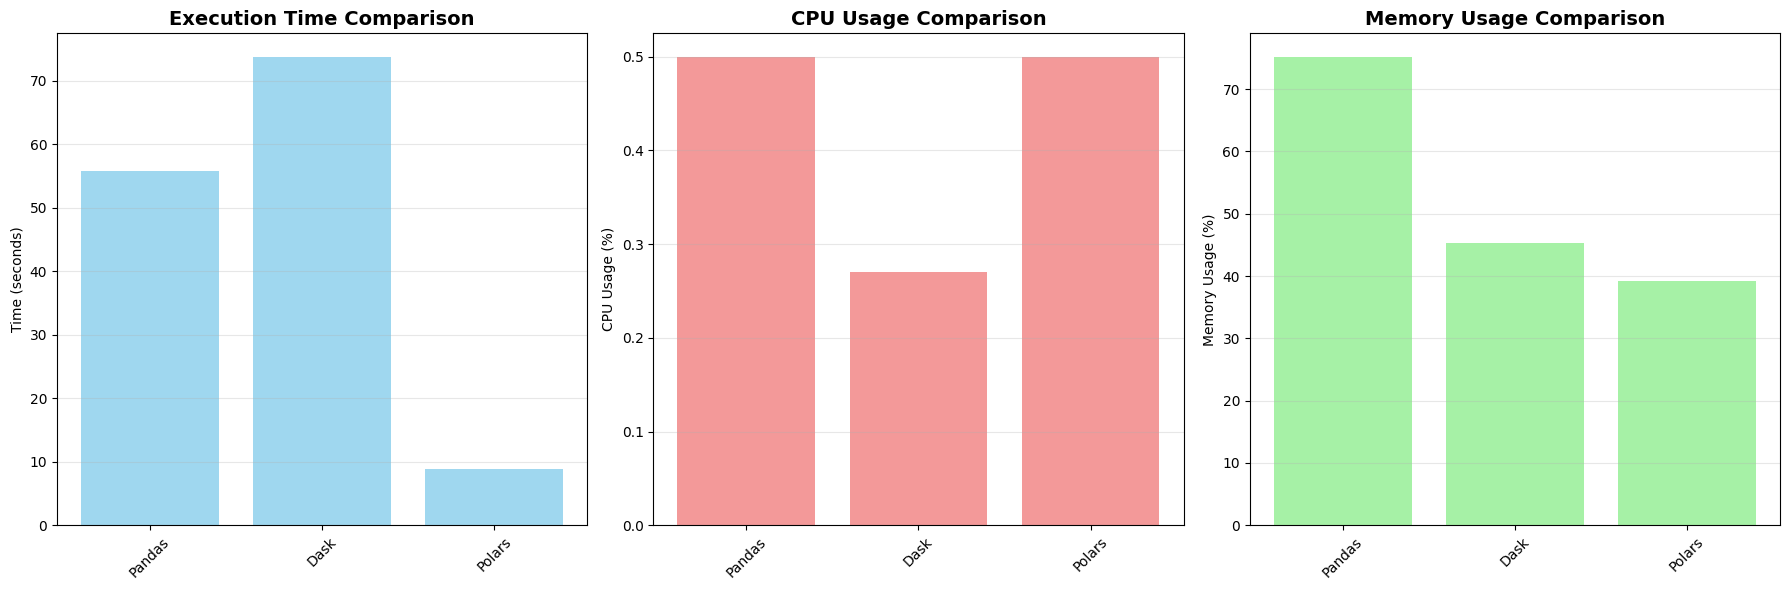


🎯 SUMMARY AND RECOMMENDATIONS
✅ Successful Libraries: 3/3

🏆 BEST OVERALL LIBRARY: Polars
Efficiency Score: 9.2563 (lower is better)

📈 LIBRARY RANKINGS (by efficiency):
1. Polars (Score: 9.2563)
2. Pandas (Score: 56.5170)
3. Dask (Score: 74.2157)

✅ CSV READING PERFORMANCE ANALYSIS COMPLETE!


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Tracker class
class Tracker:
    def __init__(self):
        self.results = {}

    def generate_comparison_table(self):
        return pd.DataFrame([{
            "Library": k,
            "Execution Time (s)": v['execution_time'],
            "CPU Usage (%)": v['cpu_usage'],
            "Memory Used (%)": v['memory_used_percentage'],
            "Success": v['success']
        } for k, v in self.results.items()])

    def find_best_library(self):
        best = min(
            (v for v in self.results.values() if v['success']),
            key=lambda m: m['execution_time'] + (m['cpu_usage'] / 100) + (m['memory_used_percentage'] / 100),
            default=None
        )
        if best:
            print("🏆 Best Library based on Efficiency:")
            for name, val in self.results.items():
                if val == best:
                    print(f"🔹 {name}: {val}")

# Example of exam result data
tracker = Tracker()

# Enter the average value of 3 tests
tracker.results = {
    "Pandas": {"execution_time": 55.76, "cpu_usage": 0.5, "memory_used_percentage": 75.2, "success": True},
    "Polars": {"execution_time": 8.86, "cpu_usage": 0.5, "memory_used_percentage": 39.13, "success": True},
    "Dask": {"execution_time": 73.76, "cpu_usage": 0.27, "memory_used_percentage": 45.3, "success": True},
}

print("\n📊 FINAL PERFORMANCE COMPARISON")
print("=" * 70)

# Comparison table
comparison_table = tracker.generate_comparison_table()
print("\n📋 LIBRARY COMPARISON TABLE:")
print(comparison_table.to_string(index=False))

# Finding best library
print("\n" + "="*70)
tracker.find_best_library()

# Visualization
successful_results = {k: v for k, v in tracker.results.items() if v['success']}

if len(successful_results) >= 2:
    print("\n📊 GENERATING PERFORMANCE CHARTS...")

    libraries = list(successful_results.keys())
    exec_times = [successful_results[s]['execution_time'] for s in libraries]
    cpu_usage = [successful_results[s]['cpu_usage'] for s in libraries]
    memory_used_pct = [successful_results[s]['memory_used_percentage'] for s in libraries]

    # Function to save individual charts
    def save_individual_chart(title, y_label, values, filename, color):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.bar(libraries, values, color=color, alpha=0.8)
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_ylabel(y_label)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"🖼️ Saved: {filename}")
        plt.close(fig)

    save_individual_chart("Execution Time Comparison", "Time (seconds)", exec_times, "execution_time_comparison_libraries.png", "skyblue")
    save_individual_chart("CPU Usage Comparison", "CPU Usage (%)", cpu_usage, "cpu_usage_comparison_libraries.png", "lightcoral")
    save_individual_chart("Memory Usage Comparison", "Memory Usage (%)", memory_used_pct, "memory_usage_comparison_libraries.png", "lightgreen")

    # Show combination chart
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    ax1.bar(libraries, exec_times, color='skyblue', alpha=0.8)
    ax1.set_title('Execution Time Comparison', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Time (seconds)')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3)

    ax2.bar(libraries, cpu_usage, color='lightcoral', alpha=0.8)
    ax2.set_title('CPU Usage Comparison', fontsize=14, fontweight='bold')
    ax2.set_ylabel('CPU Usage (%)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(axis='y', alpha=0.3)

    ax3.bar(libraries, memory_used_pct, color='lightgreen', alpha=0.8)
    ax3.set_title('Memory Usage Comparison', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Memory Usage (%)')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

# Summary
print(f"\n🎯 SUMMARY AND RECOMMENDATIONS")
print("=" * 70)

successful_libraries = [k for k, v in tracker.results.items() if v['success']]
print(f"✅ Successful Libraries: {len(successful_libraries)}/{len(tracker.results)}")

if successful_libraries:
    efficiency_scores = {}
    for lib in successful_libraries:
        metrics = tracker.results[lib]
        score = metrics['execution_time'] + (metrics['cpu_usage'] / 100) + (metrics['memory_used_percentage'] / 100)
        efficiency_scores[lib] = score

    best_overall = min(efficiency_scores.items(), key=lambda x: x[1])

    print(f"\n🏆 BEST OVERALL LIBRARY: {best_overall[0]}")
    print(f"Efficiency Score: {best_overall[1]:.4f} (lower is better)")

    print(f"\n📈 LIBRARY RANKINGS (by efficiency):")
    sorted_libraries = sorted(efficiency_scores.items(), key=lambda x: x[1])
    for i, (lib, score) in enumerate(sorted_libraries, 1):
        print(f"{i}. {lib} (Score: {score:.4f})")

print(f"\n✅ CSV READING PERFORMANCE ANALYSIS COMPLETE!")
print("=" * 70)
